
In the csv "crime_data.csv are is information about the number of crimes for every 100000 persons in every one of the states of USA. There is also the percentage of urban population. 
The Crimes have been gouped by "assault, murder and rape". 

I want to find the different clusters that exist. In that way it will be possible to determine which states are similar. This is a useful informaton because if a certain a policy has has a good impact in a State, it can also work in an other similar state. 


In [7]:
#I start importin the libraries, the data and taking a look at it.
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

data=pd.read_csv("crime_data.csv")
print(data.head())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


I will start droping the "State" variable, I do that for 2 reasons: 
    
    -It's a categorical variable, and the algorithm of K-means is not good with categorical data.
    -In the exercice, I'm asked to group the data by state and since the State is the solucion I don't want it to influence the model.

In [8]:
df=data.drop(["State"],axis=1)
print(data.head())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


The different columns show great diferences of measure, and this is a problem for the model, since it will tend to give more importance to the bigger numbers. Furthermore the feature UrbanPop is a percentage and the other features are not and this can also be a problem. 

In order to solve those problems, I can apply the "StandardScaler" fuction that will scalate the numbers so all of them are in the same scale.

In [9]:
print(data.head())
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
df=scal.fit_transform(df)

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


Now that I have the data standarized, I will create the clusters. In order to do that, I firt need to know which is the ideal number of clusters, and I will be able to determine the number using the "elbow method". 

I will start aplying the function linkage. It will show us the two points that are closer, the distance that separes them and how many points will there be in the cluster if the clusters that these two points are part of, get unified. 


[ 1  2  3  4  5  6  7  8  9 10]
[ 2.26494204  2.74211395  3.02367873  3.0557353   3.24331037  3.5315419
  3.77202625  6.52747083  7.26116776 13.6534666 ]


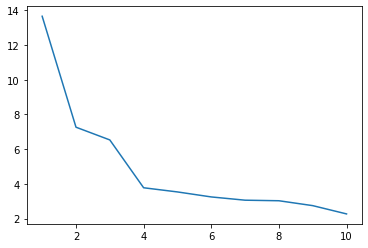

In [10]:
from scipy.cluster.hierarchy import linkage

Z = linkage(df,method="ward") #I will define the method as "ward" just because of a personal preference. 
#I think that this is the most interesting method. 


#I will start by defining the variable "last" where I will put the last 10 values that I have obtained with the "linkage" function. 
#I take the last 10 numbers because the last unions are the ones that unify the most clusters, ans thus are the most important ones.

last=Z[-10:,]


#From the different features that the linkage function offers to us, I'm only interested in the 3rd column, since this is the 
#only that I need to develop the chart for the "elbow method".
#In order to get the 3rd column I will use the following code: 
last=last[:,2]

#now that I have the column that I'm interested in, I will turn it arround (just to make it easier to understand once I 
#create the graph)
last_rev=last[::-1]

idx=np.arange(1,len(last)+1)
print(idx)
print(last)
plt.plot(idx,last_rev)
plt.show()

The graph shows two "elbows", one in 2 clusters and an other in 4 clusters.
This plot shows that this are the two numbers of clusters that are considered "optimal".

Normally what I would do in this kind of situations is to consider the specifications of the business to determine which number of clusters they prefere. However, in this case, the elbow that indicates 2 clusters, still have a lot of distance between the centroids of the cluster and the data. Because of that, I will choose to use 4 clusters. 

I will finish this case creating the clusters with "KMeans".

In [11]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=1) #I will create the model
kmeans.fit(df)#and fit the data.
print(kmeans.labels_) #Lastly I print the labels. This shows the number of cluster that every state will be in. 

print(kmeans.cluster_centers_) #I will also print the centroids of the different clusters.


[1 3 3 1 3 3 0 0 3 1 0 2 3 0 2 0 2 1 2 3 0 3 2 1 3 2 2 3 2 0 3 3 1 2 0 0 0
 0 0 1 2 1 3 0 2 0 0 2 2 0]
[[-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [ 1.42622412  0.88321132 -0.82279055  0.01946669]
 [-0.97130281 -1.11783581 -0.93954982 -0.97657842]
 [ 0.70212683  1.04999438  0.72997363  1.28990383]]


I will finish this case, identifying the different states that are in every cluster



In [12]:
one=[]
two=[]
three=[]
four=[]


for i,j in enumerate(kmeans.labels_): 
   
    if j==0:
        one.append(data.iloc[i,0])
    if j==1: 
        two.append(data.iloc[i,0])
    if j==2: 
        three.append(data.iloc[i,0])
    if j==3: 
        four.append(data.iloc[i,0])

        
def sepa(name): 
	print("\n"*2)
	return("-------{}-------".format(name))

print(sepa("one"))
print(one)
print(sepa("two"))
print(two)
print(sepa("three"))
print(three)
print(sepa("four"))
print(four)




-------one-------
['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']



-------two-------
['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']



-------three-------
['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']



-------four-------
['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'Texas']
